In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
from numpy import genfromtxt
test_pts = genfromtxt('results.csv', delimiter=',')
test_pts=test_pts.reshape(554,42,2)

In [4]:
test_data = np.load('test_images.npz', allow_pickle=True)
test_images = test_data['images']

OSError: Failed to interpret file 'test_images.npz' as a pickle

335


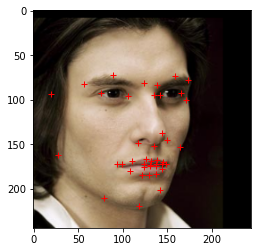

457


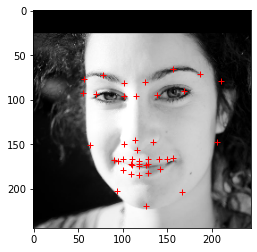

125


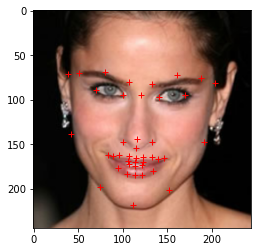

In [13]:
def visualise_pts(img, pts):
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

for i in range(3):
    idx = np.random.randint(0, test_images.shape[0])
    print(idx)
    visualise_pts(test_images[idx, ], test_pts[idx, ])

Try to change the color of lips 

In [6]:
def lips_color(idx):
    #initialization
    img=test_images[idx]
    lipsPoints = test_pts[idx][-20:]  #last 20 points are for lips
    
    #make a mask with the shape of image
    mask = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.float32)
    #draw ConvexPoly
    cv2.fillConvexPoly(mask, np.int32(lipsPoints), (30,30,30))
    mask = 255*np.uint8(mask)
    #apply closing operation to lips, it can make lips more complete
    kernel = np.ones((15,15),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  
    #apply blur, make edge of lips look natural
    mask = cv2.GaussianBlur(mask,(5,5),cv2.BORDER_DEFAULT)
    #Calculate inverse mask
    inverseMask = cv2.bitwise_not(mask)
    #Convert masks to float to perform blending
    mask = mask.astype(float)/255
    inverseMask = inverseMask.astype(float)/255
    #apply color to the lips
    lips = cv2.applyColorMap(img, cv2.COLORMAP_DEEPGREEN)
    #Convert lips and face to 0-1 range
    lips = lips.astype(float)/255
    Face = img.astype(float)/255
    #Multiply lips and face by the masks
    justLips = cv2.multiply(mask, lips)
    justFace = cv2.multiply(inverseMask, Face)
    #add them together
    result = justFace + justLips
    return result

493


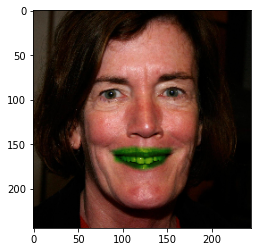

249


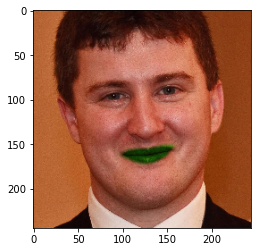

361


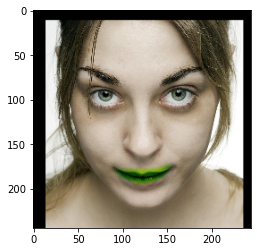

In [11]:
for i in range(3):
    idx = np.random.randint(0, test_images.shape[0])
    print(idx)
    plt.imshow(lips_color(idx))
    plt.show()

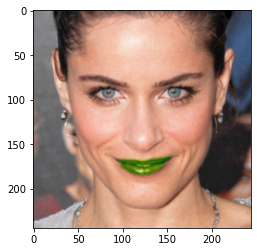

In [8]:
plt.imshow(lips_color(484))